# Data_Analysis on MovieTweetings

This is the first part of my recommender system.
I will answer the following questions.

a. How many users and movies are mentioned in the dataset? 

b. How old are the data points (number of data points per year) 

c. How popular are popular movies? Looking at the data, when will you say a movie is popular? 

d. How many long-tail movies are there? 

e. How many movies has each user rated? 

f. If you had a recommender system that only recommends the most popular movies, how good would it be?
## Input data to Data Frame

In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_table("ratings.dat", 
                   sep="::", 
                   names=['user_id', 'movie_id','rating','rating_timestamp'])


/Users/martinlopez/anaconda3/envs/AIND-NLP/lib/python3.8/site-packages/pandas/io/parsers.py:765: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


In [3]:
print(df.head())

   user_id  movie_id  rating  rating_timestamp
0        1    114508       8        1381006850
1        2     75314       1        1595468524
2        2    102926       9        1590148016
3        2    114369      10        1597555347
4        2    118715       8        1596006798


## Check min and max rating values

In [4]:
min_ = df['rating'].min()
max_ = df['rating'].max()

print(f'Min: {min_}')
print(f'Max: {max_}')

Min: 0
Max: 10


## Get unique user and movie ID's 

# 1. How many users and movies are mentioned in the dataset?

In [5]:
user_ids = np.array(df['user_id'])
unique_user_ids = np.unique(user_ids)

movie_ids = np.array(df['movie_id'])
unique_movie_ids = np.unique(movie_ids)

print(f'Unique user IDs: {unique_user_ids.size}')
print(f'Unique movie IDs: {unique_movie_ids.size}')

Unique user IDs: 69324
Unique movie IDs: 36380


## Convert Timestamp to datetime


In [6]:
from datetime import datetime

dates = []
for date in df['rating_timestamp']:
    dates.append(datetime.fromtimestamp(date))
print(dates[3] - dates[1])

24 days, 3:40:23


In [8]:
def find_min_and_max_date(data):

    earliest = data[0]
    latest = data[0]

    num =0
    for date in data:
        if date < earliest:
            earliest = date
        if date > latest:
                latest = date
    result = latest - earliest
    print(f'Eariest review: {earliest}')
    print(f'Latest review: {latest}')   
    print(f'Latest - Earliest: {result}')

In [9]:
find_min_and_max_date(dates)

Eariest review: 2013-02-28 06:38:27
Latest review: 2020-09-23 18:23:51
Latest - Earliest: 2764 days, 11:45:24


## Counter

In [10]:
from collections import Counter

In [11]:
years = []
for day in dates:
    years.append(day.year)

# 2. How old are the data points (number of datapoints per year)

In [12]:
year_count = Counter(years)
print(year_count)

Counter({2013: 170916, 2014: 156346, 2015: 123668, 2016: 112398, 2017: 105968, 2018: 81905, 2019: 74156, 2020: 63095})


## Create dictionaries with the data. 
    

In [13]:
df_dict = {'user_id': [], 'movie_id': [], 'rating': [], 'rating_timestamp': []}

for col_name, data, in df.items():
    df_dict[str(col_name)].append(data)


In [15]:
users = []

for user in df_dict['user_id']:
    for ids in user:
        users.append(ids)

<class 'list'>


In [79]:
df_dict['rating']
ratings = []
count =0
for value in df_dict['rating']:
    for rate in value:
        ratings.append(rate)

<class 'list'>


In [ ]:
movie_ids = []

for movie in df_dict['movie_id']:
    for ids in movie:
        movie_ids.append(ids)

In [24]:
movie_review_count = Counter(movie_ids)

In [17]:
user_review_count = Counter(users)


In [55]:
print(type(user_review_count))
print(type(movie_review_count))

<class 'collections.Counter'>
<class 'collections.Counter'>


In [18]:
import matplotlib.pyplot as plt

## Some user ids seem to have way more reviews than others

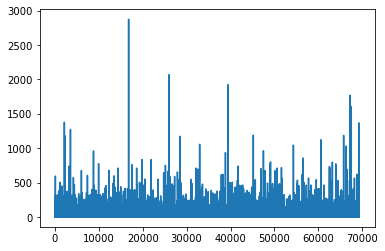

In [33]:
plt.plot(user_review_count.keys(), user_review_count.values())

[0         1381006850
1         1595468524
2         1590148016
3         1597555347
4         1596006798
             ...    
888447    1595810413
888448    1585958452
888449    1587107015
888450    1587107852
888451    1362832655
Name: rating_timestamp, Length: 888452, dtype: int64]


## Seaborn

In [44]:
import seaborn as sns


<AxesSubplot:ylabel='Density'>

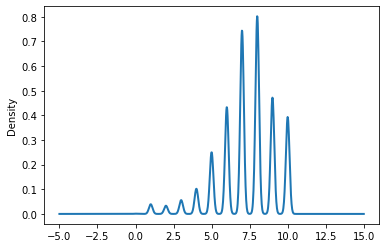

In [15]:
# sns.distplot(df['rating'])
df_ = df['rating']
df_.plot(kind='density', linewidth=2)
plt.show()

# How popular are popular movies? Looking at the data, when will you say a movie is popular?

Most of the movies seem to be 6 star rating or higher. The movies seem popular. I would sa movies are popular depending when they have an average 6 star review. 

/Users/martinlopez/anaconda3/envs/AIND-NLP/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

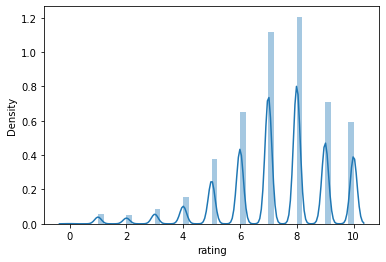

In [102]:
sns.distplot(df["rating"])

## How many long-tail movies are there? 
244331 

In [90]:
long_tains = 0

for num in ratings:
    if (num <7):
        long_tains +=1

In [86]:
popular = 0

for num in ratings:
    if (num >=7):
        popular +=1

In [91]:
print(long_tains)
print(popular)

244331
644121


## If you had a recommender system that only recommends the most popular movies, how good would it be?

It will be as good as I train it.